## Observations and Insights 

Things I still need to fix: 

- Box plots are not looking good right now - need one for each of the 4 
- Need 3 observations at the top 




In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [2]:
study_results = pd.read_csv(study_results_path)
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [3]:
# Combine the data into a single dataset
mouse_study_df = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])
# Display the data table for preview
mouse_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
# Checking the number of mice.
len(pd.unique(mouse_study_df['Mouse ID']))

249

In [5]:
# Dropping the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_study_df = mouse_study_df.drop_duplicates(subset =("Mouse ID","Timepoint"), keep = 'first')

In [6]:
mouse_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
mouse_metadata_count = mouse_study_df.count()

len(pd.unique(mouse_study_df['Mouse ID']))

249

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

summary_tumor_vol = mouse_study_df.groupby (["Drug Regimen"])
summary_tumor_vol_mean = summary_tumor_vol.mean()
s1 = summary_tumor_vol_mean["Tumor Volume (mm3)"]

In [9]:
summary_tumor_vol = mouse_study_df.groupby (["Drug Regimen"])
summary_tumor_vol_median = summary_tumor_vol.median()
s2 = summary_tumor_vol_median["Tumor Volume (mm3)"]

In [10]:
summary_tumor_vol = mouse_study_df.groupby (["Drug Regimen"])
summary_tumor_vol_var = summary_tumor_vol.var()
s3 = summary_tumor_vol_var["Tumor Volume (mm3)"]

In [11]:
summary_tumor_vol = mouse_study_df.groupby (["Drug Regimen"])
summary_tumor_vol_std = summary_tumor_vol.std()
s4 = summary_tumor_vol_std["Tumor Volume (mm3)"]

In [12]:
summary_tumor_vol = mouse_study_df.groupby (["Drug Regimen"])
summary_tumor_vol_sem = summary_tumor_vol.sem()
s5 = summary_tumor_vol_sem["Tumor Volume (mm3)"]

In [13]:
sum_df = pd.DataFrame({"Mean Tumor Volume" : s1,"Median Tumor Volume" : s2,"Tumor Volume Variance" : s3,"Tumor Volume Std. Dev" : s4,"SEM of Tumor Volume" : s5})
sum_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,SEM of Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [14]:
# Using the aggregation method, produce the same summary statistics in a single line
sum_df.agg(['mean', 'median','var','std','sem'])

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,SEM of Tumor Volume
mean,50.983236,49.948493,47.787119,6.815695,0.500938
median,53.060651,51.819532,45.836079,6.767301,0.521130
var,31.621099,22.218503,256.955461,1.481573,0.010570
std,5.623264,4.713651,16.029830,1.217199,0.102812
sem,1.778232,1.490587,5.069077,0.384912,0.032512


## Bar and Pie Charts

In [15]:
#generate lists from the dataframes that give the drug list and count of timepoints tested 
mouse_study_df_g = mouse_study_df.groupby(["Drug Regimen"])
mouse_study_df_g = mouse_study_df_g.count()
drug_regimen = mouse_study_df_g.index.tolist()
timepointcount_by_drug = (mouse_study_df_g.iloc[:,4]).tolist()
mouse_study_df_drug_reg = mouse_study_df_g.loc[:,"Tumor Volume (mm3)"]


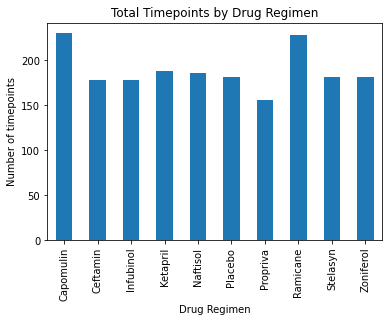

In [16]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
#DataFrame.plot()  

bar_chart = mouse_study_df_drug_reg.plot.bar(title = "Total Timepoints by Drug Regimen")
bar_chart.set_xlabel("Drug Regimen")
bar_chart.set_ylabel("Number of timepoints")
plt.show()

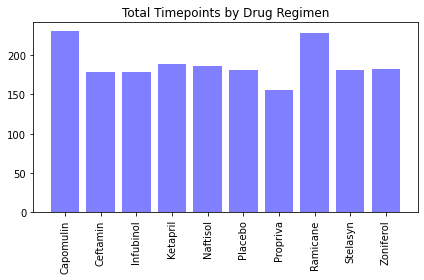

In [17]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
#pyplot
x_axis = np.arange(len(timepointcount_by_drug))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(6,4))
plt.title("Total Timepoints by Drug Regimen")
plt.bar(x_axis, timepointcount_by_drug, color='b', alpha=0.5, align="center")
plt.xticks(tick_locations, drug_regimen, rotation = 'vertical')
plt.tight_layout()

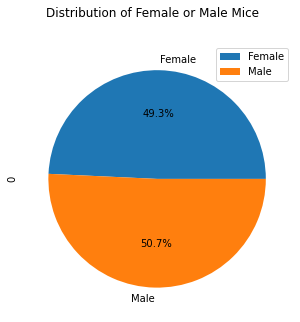

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
summary_MF = mouse_study_df.groupby (["Sex"])
summary_MF_sum = summary_MF.count()

mf_mouse = summary_MF_sum.index.tolist()
sex_count = (summary_MF_sum.iloc[:,1]).tolist()

df = pd.DataFrame(sex_count,mf_mouse)

df.plot(kind='pie', title = 'Distribution of Female or Male Mice', subplots=True, figsize=(5, 5), autopct='%1.1f%%')

plt.show()

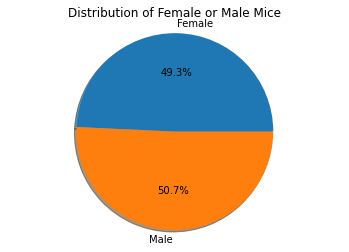

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Tell matplotlib to create a pie chart based upon the above data

plt.pie(sex_count, labels=mf_mouse, autopct="%1.1f%%", shadow=True, startangle=0)

# Create axes which are equal so we have a perfect circle
plt.title('Distribution of Female or Male Mice')

plt.axis("equal")
# Save an image of our chart and print the final product to the screen
plt.show()


## Quartiles, Outliers and Boxplots

In [20]:
mouse_study_df.count()

Mouse ID              1888
Drug Regimen          1888
Sex                   1888
Age_months            1888
Weight (g)            1888
Timepoint             1888
Tumor Volume (mm3)    1888
Metastatic Sites      1888
dtype: int64

In [21]:
#Using Matplotlib, generate a box and whisker plot of the final tumor 
#   volume for all four treatment regimens and highlight any potential 
#   outliers in the plot by changing their color and style.

#Hint: All four box plots should be within the same figure. Use this Matplotlib 
# documentation page for help with changing the style of the outliers.
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
mouse_study_df_4drug = mouse_study_df.loc[mouse_study_df['Drug Regimen'].isin(drug_list)]
mouse_study_df_4drug


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1868,z581,Infubinol,Female,24,25,25,54.316407,2
1869,z581,Infubinol,Female,24,25,30,56.286750,2
1870,z581,Infubinol,Female,24,25,35,58.628399,3
1871,z581,Infubinol,Female,24,25,40,60.053740,3


In [22]:
# Start by getting the last (greatest) timepoint for each mouse
max_timepoint_mice = mouse_study_df_4drug.groupby(["Mouse ID"])['Timepoint'].max().reset_index()
print(max_timepoint_mice)


   Mouse ID  Timepoint
0      a203         45
1      a251         45
2      a275         45
3      a411         45
4      a444         45
..      ...        ...
95     y769         45
96     y793         45
97     y865         45
98     z578         45
99     z581         45

[100 rows x 2 columns]


In [23]:
#drug_regimen = mouse_study_df_g.index.tolist()
#drug_regimen
#maxtimepoint_vol_by_mouse = (mouse_study_df_4drug_max.iloc[:,4]).tolist()

In [24]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
mouse_study_df_4drug = pd.merge(mouse_study_df_4drug,max_timepoint_mice, on=["Mouse ID","Timepoint"])
mouse_study_df_4drug

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
95,x822,Ceftamin,Male,3,29,45,61.386660,3
96,y163,Infubinol,Female,17,27,45,67.685569,3
97,y769,Ceftamin,Female,6,27,45,68.594745,4
98,y865,Ceftamin,Male,23,26,45,64.729837,3


In [35]:
# Put treatments into a list for for loop (and later for plot labels)
# drug_list is the list of 4 drugs from a previous step 

# Create empty dict to fill with tumor vol data (for plotting)
tumor_vol_by_drug = {}

for drug in drug_list:
    print(drug)
    # Locate the rows which contain mice on the particular drug and get the tumor volumes
    
    mouse_study_1_drug = mouse_study_df_4drug.loc[mouse_study_df_4drug['Drug Regimen'] == drug, 'Tumor Volume (mm3)']                     
    
    # add subset 
    # create a dict of drug name and list of tumor vol data 
    
    tumor_vol_by_drug[drug] = mouse_study_1_drug

    # Calculate the IQR and quantitatively determine if there are any potential outliers for each   
    quartiles = (mouse_study_1_drug).quantile([.25,.5,.75])
    print(quartiles)
    
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    print(f"The lower quartile is: {lowerq}")
    print(f"The upper quartile is: {upperq}")
    print(f"The interquartile range is: {iqr}")
    print(f"The the median is: {quartiles[0.5]} ")

    #Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")

    #pull out the outliers 
    #outliers = mouse_study_1_drug.loc[(mouse_study_1_drug < lower_bound) | (mouse_study_1_drug > upper_bound)]
    #print(outliers)



Capomulin
0.25    32.377357
0.50    38.125164
0.75    40.159220
Name: Tumor Volume (mm3), dtype: float64
The lower quartile is: 32.37735684
The upper quartile is: 40.1592203
The interquartile range is: 7.781863460000004
The the median is: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
Ramicane
0.25    31.560470
0.50    36.561652
0.75    40.659006
Name: Tumor Volume (mm3), dtype: float64
The lower quartile is: 31.56046955
The upper quartile is: 40.65900627
The interquartile range is: 9.098536719999998
The the median is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
Infubinol
0.25    54.048608
0.50    60.165180
0.75    65.525743
Name: Tumor Volume (mm3), dtype: float64
The lower quartile is: 54.04860769
The upper quartile is: 65.52574285
The interquartile range is: 11.477135160000003
The the median is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Valu

TypeError: boxplot() got an unexpected keyword argument 'label'

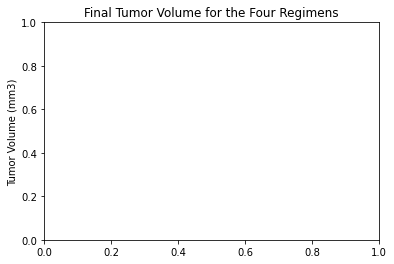

In [40]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume for the Four Regimens')
ax1.set_ylabel('Tumor Volume (mm3)')
labels = drug_list

# #for drug in drug_list:
# #volumes = tumor_vol_by_drug[drug]
# #ax1.boxplot(volumes, labels=drug_list)
# ax1.boxplot(tumor_vol_by_drug)    

# plt.show()

ax1.boxplot(volumes, label=labels)
plt.show()

## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
drug_list = ["Capomulin"]
mouse_study_df_capomulin = mouse_study_df.loc[mouse_study_df['Drug Regimen'].isin(drug_list)]
mouse_id = ['r157']
mouse_study_df_capomulin_r157 = mouse_study_df.loc[mouse_study_df['Mouse ID'].isin(mouse_id)]

x_axis = mouse_study_df_capomulin_r157["Timepoint"]
y_axis = mouse_study_df_capomulin_r157["Tumor Volume (mm3)"]

plt.title("Capomulin Tumor Volume over Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint")

plt.plot(x_axis, y_axis)
# Show the graph that we have created
plt.show()

In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

x_axis = mouse_study_df_capomulin["Weight (g)"]
y_axis = mouse_study_df_capomulin["Tumor Volume (mm3)"]

plt.scatter(x_axis, y_axis, marker="o")

# Incorporate the other graph properties
plt.title("Capomulin Tumor Volume by Mouse Weight")
plt.ylabel("Weight (g)")
plt.xlabel("Tumor Volume (mm3)")
plt.grid(True)

# Show plot
plt.show()

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x_values = mouse_study_df_capomulin["Weight (g)"]
y_values = mouse_study_df_capomulin["Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values,y_values)
plt.title("Capomulin Tumor Volume by Mouse Weight")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,30),fontsize=15,color="green")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()
